In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None

# KREDİ TAHMİNİ VERİ SETİ

Bu veri setinde bankaların müşterilerine vereceği krediler için, kredi çekmek isteyen müşterinin durum analizi yapılması esas alınmıştır. 

Bu durumda kredi talebinin onaylanıp onaylanmayacağını makine öğrenmesi algoritmaları ile öngörmemizi gerektiren bir sınıflandırma problemi ile karşılaşmaktayız.


Kullanılan veri setinde :

    Loan_ID (Müşteri Numarası),

    Gender (Cinsiyet),

    Married (Evlilik),

    Dependents (Bağımlı Kişi Sayısı),

    Education (Eğitim),

    Self_Employed (Çalışma Şekli),

    ApplicantIncome (Gelir),

    CoapplicantIncome (Kefil Geliri),

    LoanAmount (Kredi Tutarı),

    Loan_Amount_Term (Kredi Vadesi),

    Credit_History (Kredi Geçmişi),

    Property_Area (Bölge) ,

    Loan_Status (Kredi Durumu) değişkenleri yer almaktadır.

Değişkenler 12 bağımsız 1 bağımlı değişken olarak ayrılmaktadır.

In [25]:
ds = pd.read_csv("C:\\Users\\Merve\\Nöron Ağları Proje\\train_kredi_tahmini.csv") #csv dosyasi okuma

# 1-VERİ SETİ ANALİZİ

Veri setinde 13 sütun, 614 kayıt bulunmaktadır.

info() fonksiyonu ile içeriğine bakıldığında verilerin object, int64, float64 tiplerinde olduğu görülmektedir;
içeriğinde null değerler bulunmaktadır.

In [26]:
ds.info()    #sutunlar hakkinde bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
ds.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
ds.shape  #(kayit sayisi,sutun sayisi)

(614, 13)

In [29]:
ds.describe()   #numeric olan sutunların istatistiksel verileri

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2-PREPROCESS (ÖN İŞLEME AŞAMASI)

Tekrarlanan veri kontrolünde herhangi bir tekrar eden satır bulunmamıştır.

149 hücrede Nan değer tespit edilmiştir.

In [30]:
ds.duplicated().sum()   #tekrarlanan satır var mi kontrol

0

In [31]:
print(ds.isnull().sum()) #null olan hücre sayisi her bir sutun icin
print("Toplam Nan hucre sayisi : {}".format(ds.isnull().sum().sum()))  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Toplam Nan hucre sayisi : 149


In [32]:
def missingValues(ds):
    missingValue=ds.isnull().sum()
    missingValuePercent=100*ds.isnull().sum()/len(ds)
    missingValueTab=pd.concat([missingValue,missingValuePercent],axis=1)
    missingValueTable=missingValueTab.rename(
    columns ={0:'Eksik Degerler',1:'% Degeri'})
    return missingValueTable

missingValues(ds)

,Eksik Degerler,% Degeri
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


# 2.1 EKSİK DEĞERLERİN KALDIRILMASI & DOLDURULMASI

Gender ve Married sütununda Nan değer olan satırlar veri setinden kaldırılmıştır.

Self_Employed, Dependents, Loan_Status sütunlarındaki değerler replace metodu ile numeric hale gelmiştir.

Veri setindeki kalan Nan değerler ilgili sütunun medyan değerleri ile doldurulmuştur.

In [33]:
ds_crop = ds.dropna(subset=["Gender","Married"])     #gender ve married verileri bos olan satirlar silindi

In [34]:
ds_crop[['Self_Employed']]=ds_crop[['Self_Employed']].replace('No',0)
ds_crop[['Self_Employed']]=ds_crop[['Self_Employed']].replace('Yes',1)

ds_crop[['Dependents']]=ds_crop[['Dependents']].replace('0',0)
ds_crop[['Dependents']]=ds_crop[['Dependents']].replace('1',1)
ds_crop[['Dependents']]=ds_crop[['Dependents']].replace('2',2)
ds_crop[['Dependents']]=ds_crop[['Dependents']].replace('3+',3)

ds_crop[['Loan_Status']]=ds_crop[['Loan_Status']].replace('N',0)
ds_crop[['Loan_Status']]=ds_crop[['Loan_Status']].replace('Y',1)
#Maskeleme yapiyorum. Ilgili sutun adlarındaki ilgili degerleri degistiriyorum boylece verileri numeric yapmis oluyorum

In [35]:
ds_fill=ds_crop.fillna(ds_crop.median()) #Nan hucreler median degere gore dolduruldu

In [36]:
missingValues(ds_fill)   #Nan veri kalmadi

,Eksik Degerler,% Degeri
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [37]:
ds_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    float64
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 65.4+ KB


# 2.2 VERİ TİPİ DÖNÜŞÜMÜ

Replace fonksiyonu ile içerikleri değişen sütunların veri tipleri int64 yapılmıştır.

In [38]:
ds_fill['Dependents'] = ds_fill['Dependents'].astype('int64')
ds_fill['Self_Employed'] = ds_fill['Self_Employed'].astype('int64')
ds_fill['CoapplicantIncome'] = ds_fill['CoapplicantIncome'].astype('int64')
ds_fill['LoanAmount'] = ds_fill['LoanAmount'].astype('int64')
ds_fill['Loan_Amount_Term'] = ds_fill['Loan_Amount_Term'].astype('int64')
ds_fill['Credit_History'] = ds_fill['Credit_History'].astype('int64')

Nan değer bulunan satırlara gerekli işlemlerin yapılması ardından veri setinde 598 kayıt kalmıştır

In [39]:
ds_fill.shape  #(kayit sayisi,sutun sayisi)

(598, 13)

# 2.3 AYKIRI DEĞER BOXPLOT GRAFİKLERİ

Kutu grafiği gösteriminde aykırı değerler nokta ile gösterilirken veride yoğun olarak bulunan değerler kutular halinde gösterilmektedir. 

Aykırı değer analizine bakıldığında bazı aykırı değerlerin bulunduğu görülmüş fakat bu değerler algoritma sonucuna etki edebileceği için değerli görülüp herhangi bir işlem uygulanmamıştır.

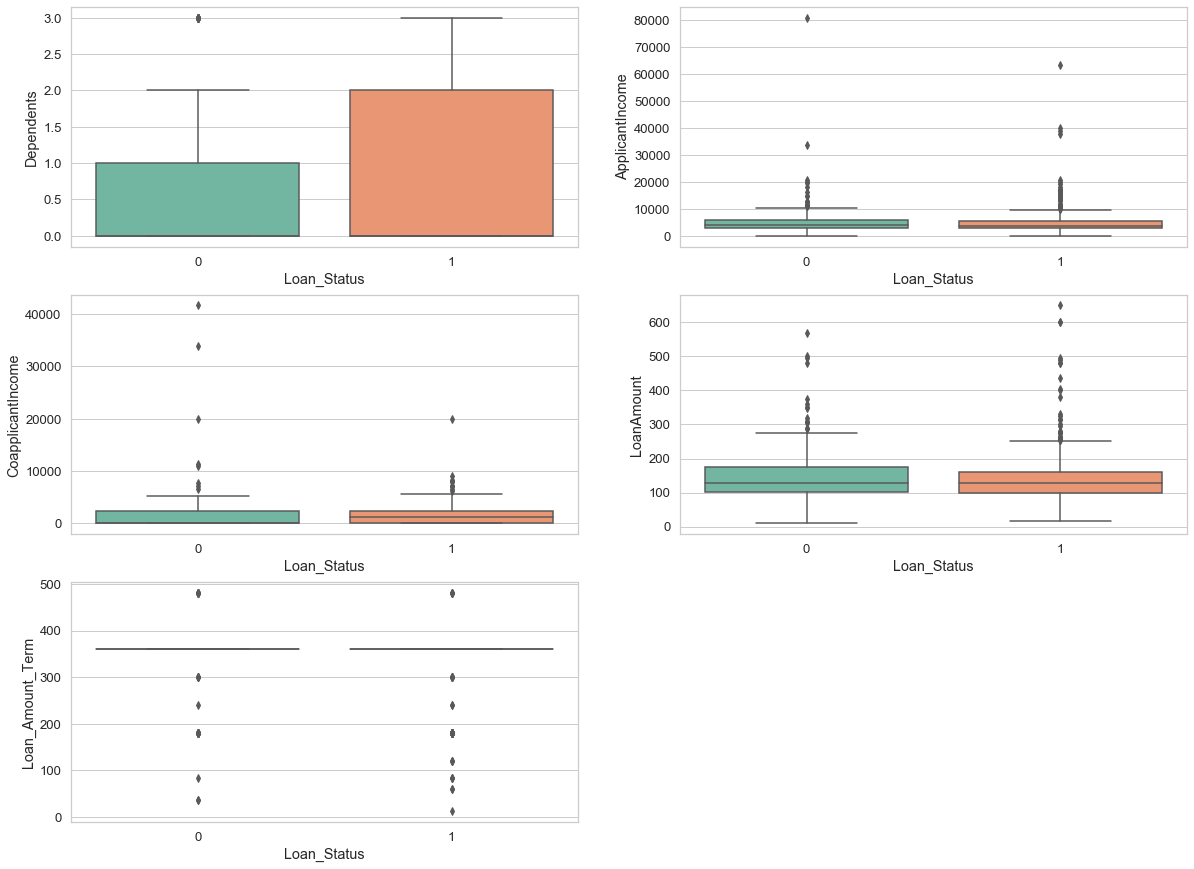

In [40]:
sns.set(style="whitegrid",font_scale=1.2,palette='Set2')
plt.subplots(figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(x='Loan_Status', y='Dependents',data=ds_fill)
plt.subplot(3,2,2)
sns.boxplot(x='Loan_Status', y='ApplicantIncome',data=ds_fill)
plt.subplot(3,2,3)
sns.boxplot(x='Loan_Status', y='CoapplicantIncome',data=ds_fill)
plt.subplot(3,2,4)
sns.boxplot(x='Loan_Status', y='LoanAmount',data=ds_fill)
plt.subplot(3,2,5)
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term',data=ds_fill)

# 2.4 VERİ SETİ DENGESİZLİĞİ KONTROLÜ

598 kayıt bulunan veri setinde hedef değişkeninde,

              0 için 187 kayıt,
              1 için 411 kayıt bulunmaktadır.

Bu değerlerin veri setinin %31 ve %69'lik oranlarına denk gelmesi veri setinde dengesizlik olduğunun göstergesidir.

1    411
0    187
Name: Loan_Status, dtype: int64
1    0.687291
0    0.312709
Name: Loan_Status, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


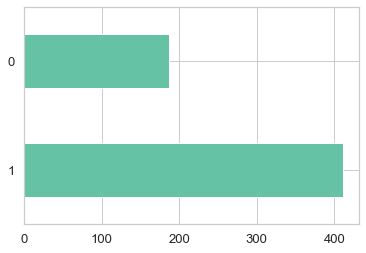

In [41]:
print(ds_fill['Loan_Status'].value_counts())
print(ds_fill['Loan_Status'].value_counts()/np.float(len(ds_fill)))
print(ds_fill['Loan_Status'].value_counts().plot.barh())

In [42]:
#Bağımsız değişkenler ve hedef değişkeni ayriliyor
features = ['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
ds_x = ds_fill.loc[:,features]
ds_y = ds_fill.loc[:,['Loan_Status']]

# 2.7 STANDARDİZASYON

Standardizasyon işlemi, değişkenlerin standart bir normal dağılım özelliklerine sahip olacak şekilde yeniden
ölçeklendirilmesidir.

Veri setinin,
              
             %60'ı train(eğitim) set
             
             %40'ı test set olarak bölünmüştür. 
Bu bölünme işleminde random_state parametresi 44 olarak belirlenmiştir.

In [43]:
ds_x = StandardScaler().fit_transform(ds_x)

In [44]:
import KrediNN as model

X_train, X_test, y_train, y_test = train_test_split(np.array(ds_x), np.array(ds_y), test_size = 0.4, random_state = 44)
model = model.KrediNN(X_train.shape[1])

In [45]:
model.train(X_train,y_train)

Epoch 0 loss: 0.209
Epoch 10 loss: 0.162
Epoch 20 loss: 0.160
Epoch 30 loss: 0.158
Epoch 40 loss: 0.156
Epoch 50 loss: 0.154
Epoch 60 loss: 0.152
Epoch 70 loss: 0.151
Epoch 80 loss: 0.150
Epoch 90 loss: 0.150
Epoch 100 loss: 0.150
Epoch 110 loss: 0.150
Epoch 120 loss: 0.149
Epoch 130 loss: 0.149
Epoch 140 loss: 0.149
Epoch 150 loss: 0.149
Epoch 160 loss: 0.149
Epoch 170 loss: 0.149
Epoch 180 loss: 0.149
Epoch 190 loss: 0.149
Epoch 200 loss: 0.149
Epoch 210 loss: 0.149
Epoch 220 loss: 0.149
Epoch 230 loss: 0.149
Epoch 240 loss: 0.149
Epoch 250 loss: 0.149
Epoch 260 loss: 0.149
Epoch 270 loss: 0.149
Epoch 280 loss: 0.149
Epoch 290 loss: 0.149
Epoch 300 loss: 0.149
Epoch 310 loss: 0.149
Epoch 320 loss: 0.149
Epoch 330 loss: 0.149
Epoch 340 loss: 0.149
Epoch 350 loss: 0.149
Epoch 360 loss: 0.149
Epoch 370 loss: 0.149
Epoch 380 loss: 0.149
Epoch 390 loss: 0.149
Epoch 400 loss: 0.149
Epoch 410 loss: 0.149
Epoch 420 loss: 0.149
Epoch 430 loss: 0.149
Epoch 440 loss: 0.149
Epoch 450 loss: 0.149

In [46]:
true = 0
false = 0
for i in range(X_test.shape[0]):
    t = model.test(X_test[i])
    if round(t[0]) == y_test[i]:
        true += 1
    else :
        false += 1

print("Doğru tahmin: ", true)
print("Yanlış tahmin: ", false)
print("tahmin: ", true/(true+false))

Doğru tahmin:  204
Yanlış tahmin:  36
tahmin:  0.85
